In [2]:
import os
import sys
import talib
import pandas as pd
import yfinance as yf
import plotly as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

ModuleNotFoundError: No module named 'yfinance'

In [4]:
!pip install yfinance pandas

  Using cached yfinance-0.2.43-py2.py3-none-any.whl.metadata (11 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached peewee-3.17.6-py3-none-any.whl
  Using cached html5lib-1.1-py2.py3-none-any.whl.metadata (16 kB)
Using cached yfinance-0.2.43-py2.py3-none-any.whl (84 kB)
Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)


In [6]:
import os
import sys
import talib
import pandas as pd
import yfinance as yf
import plotly as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## reading the data

In [54]:
df = pd.read_csv(r"C:\Users\hp\Downloads\week 1 data\Data-20240826T133225Z-001\Data\yfinance_data\yfinance_data\AAPL_historical_data.csv")

required_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
df = df[required_columns]

print(df.head())

         Date      Open      High       Low     Close     Volume
0  1980-12-12  0.128348  0.128906  0.128348  0.128348  469033600
1  1980-12-15  0.122210  0.122210  0.121652  0.121652  175884800
2  1980-12-16  0.113281  0.113281  0.112723  0.112723  105728000
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   86441600
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   73449600


## COMPUTE TECHNICAL INDICATORS

In [40]:

def compute_technical_indicators(df):
  
    # Validate input DataFrame
   # if 'Date' not in df.columns or 'Close' not in df.columns:
    #    raise ValueError("DataFrame must contain 'Date' and 'Close' columns.")

    # Convert 'Date' column to datetime and set as index
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

    # Calculate technical indicators
    df['SMA20'] = talib.SMA(df['Close'], timeperiod=24)
    df['EMA20'] = talib.EMA(df['Close'], timeperiod=24)
    df['RSI14'] = talib.RSI(df['Close'], timeperiod=14)
    
    macd, macdsignal, macdhist = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
    df['MACD'] = macd
    df['MACD_Signal'] = macdsignal
    df['MACD_Histogram'] = macdhist

    # Calculate additional metrics
    df['Daily_Return'] = df['Close'].pct_change()
    df['Volatility21'] = df['Daily_Return'].rolling(window=21).std()

    return df


In [94]:
if ('Date' in df.columns):
    print("true")
else:
    print("false")



true


## FUCTION TO PLOT TECHNICAL INDICATORS

In [29]:


def plot_technical_indicators(df):
   
    # Ensure the DataFrame has data for the year 2020
    if df.index.year.min() > 2020 or df.index.year.max() < 2020:
        raise ValueError("DataFrame does not contain data for the year 2020.")

    df_2020 = df.loc['2020-01-01':'2020-12-31']

    # Create subplots
    fig, axs = plt.subplots(4, 1, figsize=(14, 15), sharex=True)

    # Plot Close Price and Moving Averages
    axs[0].plot(df_2020['Close'], label='Close Price', color='black', linewidth=1.2)
    axs[0].plot(df_2020['SMA20'], label='SMA20', color='blue', linestyle='--')
    axs[0].plot(df_2020['EMA20'], label='EMA20', color='red', linestyle='-.')
    axs[0].set_title('Close Price and Moving Averages (2020)')
    axs[0].set_ylabel('Price')
    axs[0].legend()
    axs[0].xaxis.set_major_locator(mdates.MonthLocator())
    axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

    # Plot RSI
    axs[1].plot(df_2020['RSI14'], label='RSI14', color='green', linewidth=1.2)
    axs[1].axhline(70, color='red', linestyle='--', linewidth=0.8)
    axs[1].axhline(30, color='red', linestyle='--', linewidth=0.8)
    axs[1].set_title('Relative Strength Index (RSI14) (2020)')
    axs[1].set_ylabel('RSI')
    axs[1].legend()
    axs[1].xaxis.set_major_locator(mdates.MonthLocator())
    axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

    # Plot MACD
    axs[2].plot(df_2020['MACD'], label='MACD', color='blue', linewidth=1.2)
    axs[2].plot(df_2020['MACD_Signal'], label='MACD Signal', color='red', linewidth=1.2)
    axs[2].bar(df_2020.index, df_2020['MACD_Histogram'], label='MACD Histogram', color='grey', alpha=0.5)
    axs[2].set_title('MACD Indicator (2020)')
    axs[2].set_ylabel('MACD')
    axs[2].legend()
    axs[2].xaxis.set_major_locator(mdates.MonthLocator())
    axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

    # Plot Close Price and Volatility
    axs[3].plot(df_2020['Close'], label='Close Price', color='black', linewidth=1.2)
    axs[3].plot(df_2020['Volatility21'], label='Volatility21', color='blue', linestyle='--')
    axs[3].set_title('Volatility (2020)')
    axs[3].set_ylabel('Volatility')
    axs[3].legend()
    axs[3].xaxis.set_major_locator(mdates.MonthLocator())
    axs[3].xaxis.set_major_formatter(mdates.DateFormatter('%b'))

    plt.tight_layout()
    plt.show()



## FOR APPLE STOCK

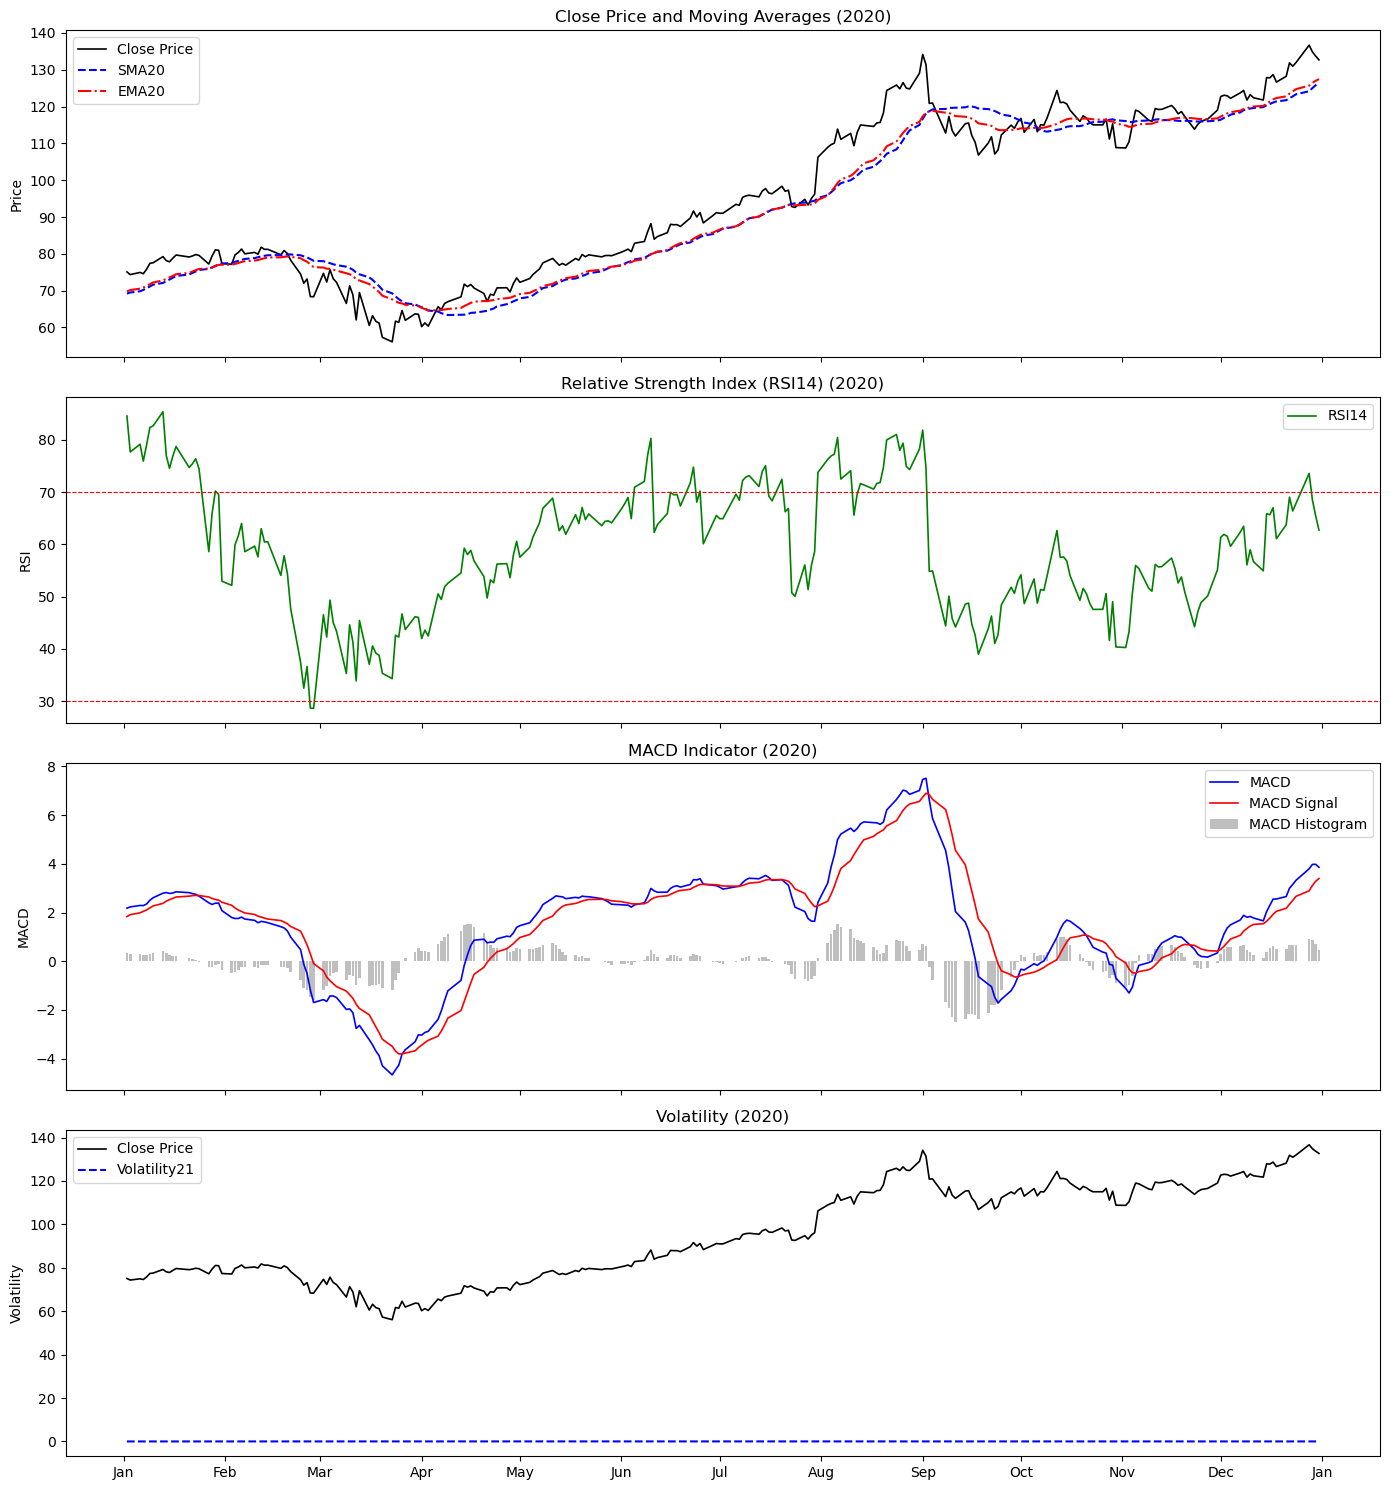

In [46]:
apple = compute_technical_indicators(df)
plot_technical_indicators(apple)


## for  META stock

reading the data

In [62]:
meta_data = r"C:\Users\hp\Downloads\week 1 data\Data-20240826T133225Z-001\Data\yfinance_data\yfinance_data\META_historical_data.csv"

META = pd.read_csv(meta_data)

required_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
META = META[required_columns]

print(META.head())

         Date       Open       High        Low      Close    Volume
0  2012-12-12  28.000000  28.139999  27.370001  27.580000  46704200
1  2012-12-13  27.590000  28.750000  27.430000  28.240000  81051600
2  2012-12-14  28.180000  28.330000  26.760000  26.809999  91631600
3  2012-12-17  26.770000  27.000000  26.320000  26.750000  57742500
4  2012-12-18  26.959999  27.910000  26.900000  27.709999  60512900


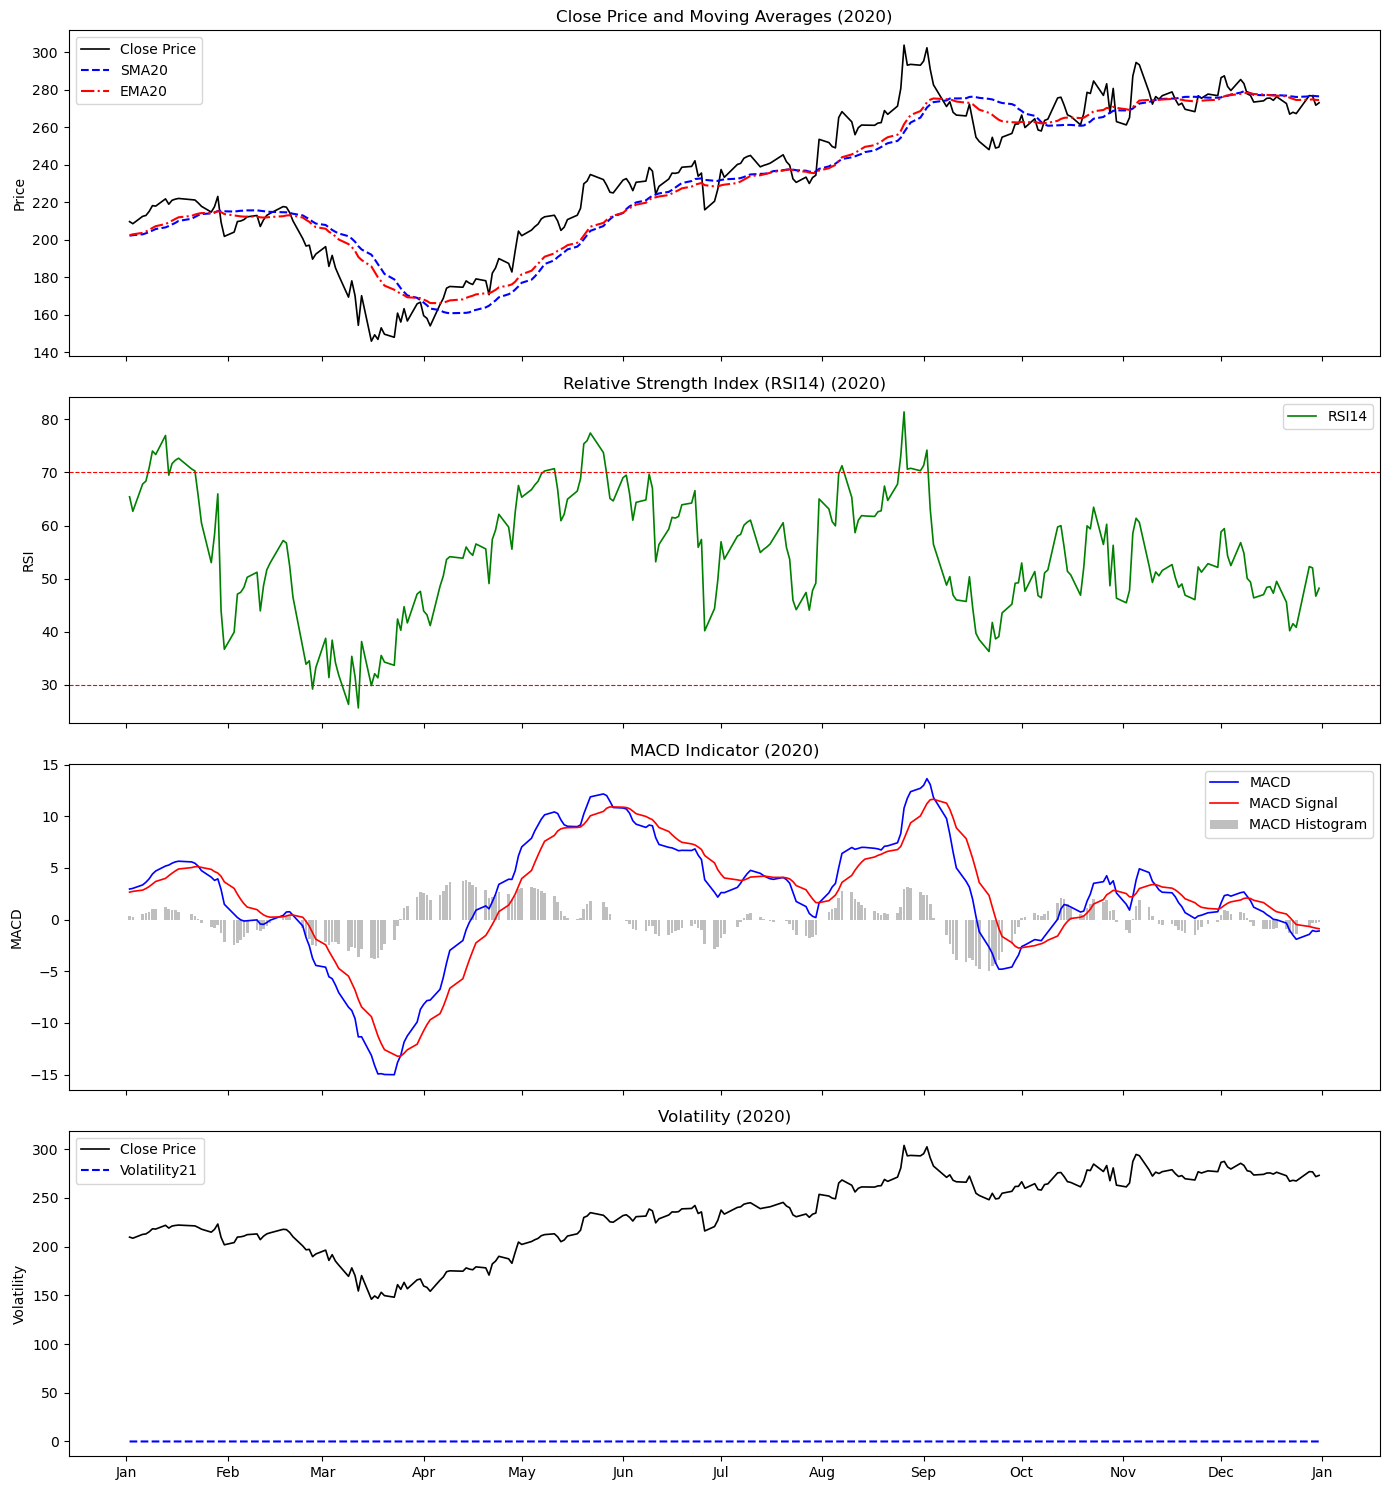

In [64]:
meta1 = compute_technical_indicators(META)
plot_technical_indicators(meta1)


## FOR AMAZON STOCK

READING THE DATA

In [68]:
amzn_data = r"C:\Users\hp\Downloads\week 1 data\Data-20240826T133225Z-001\Data\yfinance_data\yfinance_data\AMZN_historical_data.csv"

AMZN = pd.read_csv(amzn_data)
required_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
AMZN = AMZN[required_columns]

print(AMZN.head())

         Date      Open      High       Low     Close      Volume
0  1997-05-15  0.121875  0.125000  0.096354  0.097917  1443120000
1  1997-05-16  0.098438  0.098958  0.085417  0.086458   294000000
2  1997-05-19  0.088021  0.088542  0.081250  0.085417   122136000
3  1997-05-20  0.086458  0.087500  0.081771  0.081771   109344000
4  1997-05-21  0.081771  0.082292  0.068750  0.071354   377064000


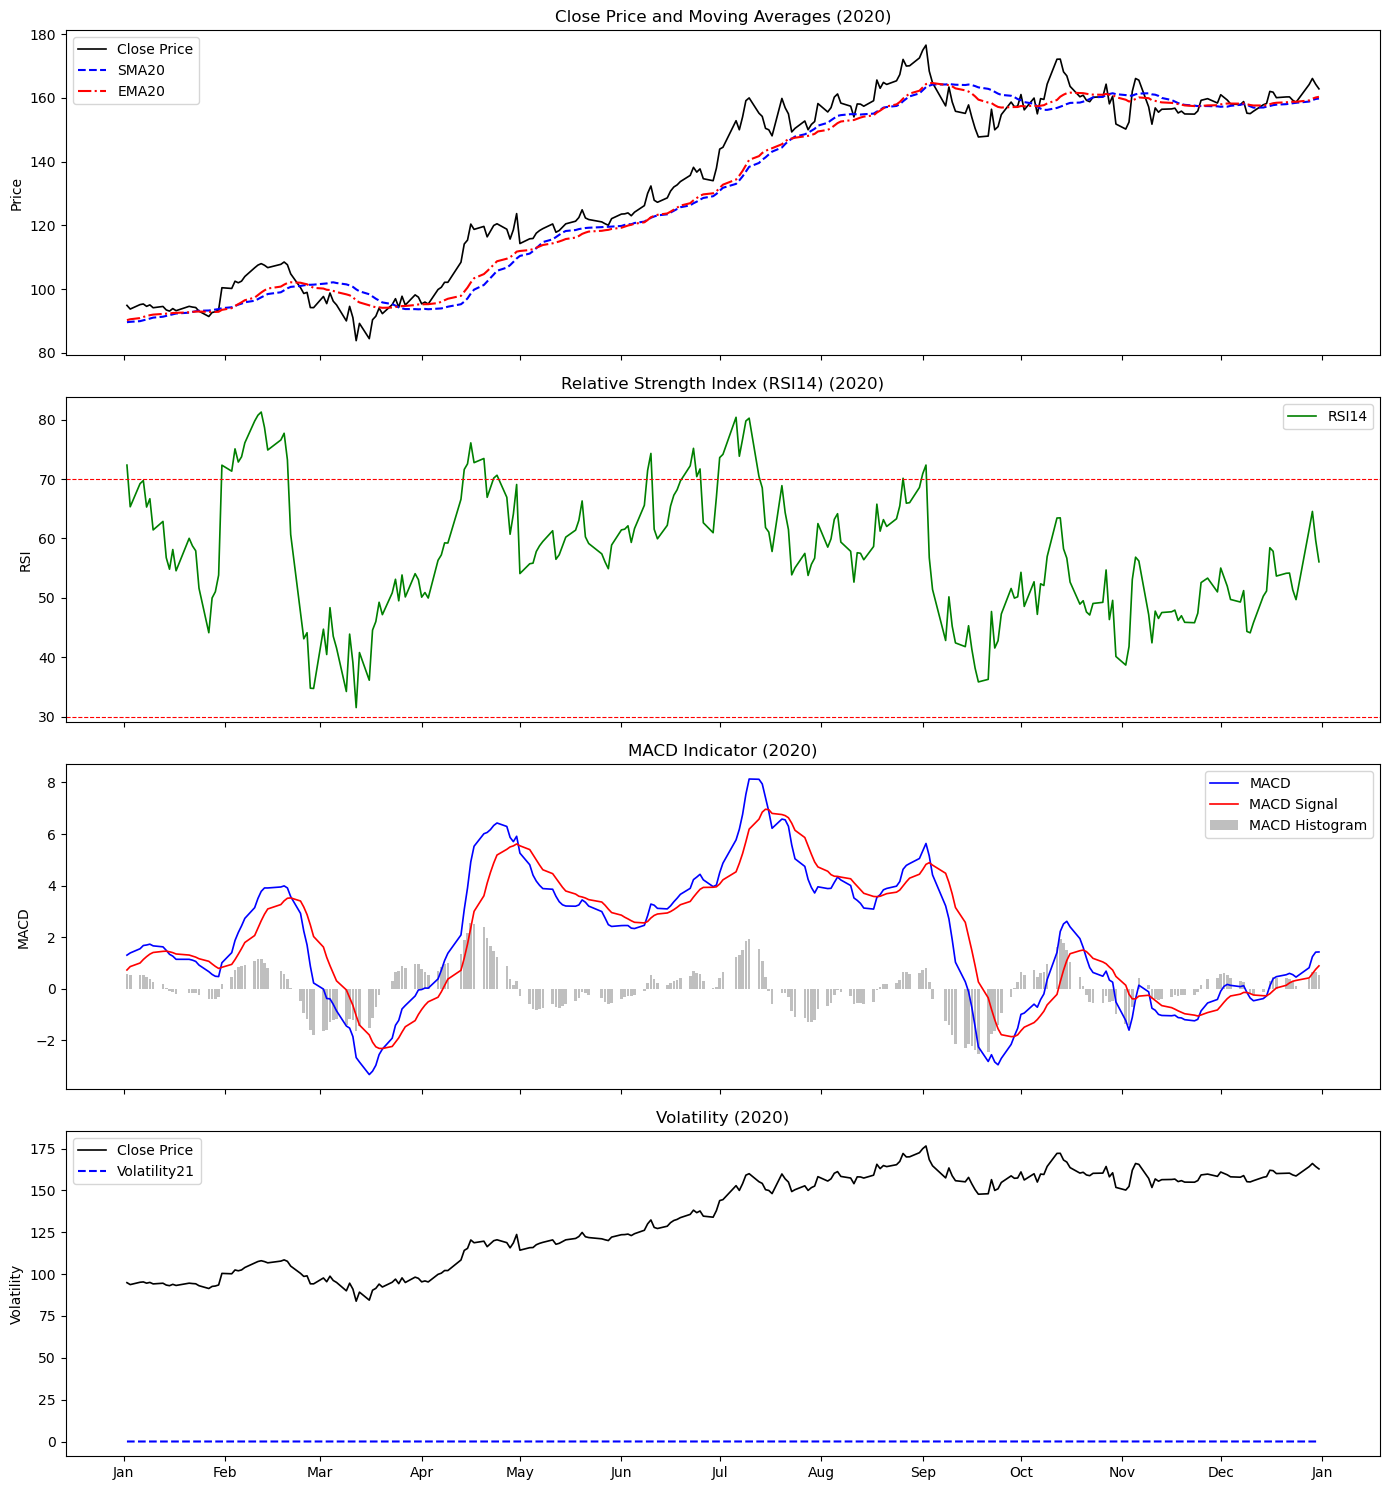

In [70]:
amzn1 = compute_technical_indicators(AMZN)
plot_technical_indicators(amzn1)

## google stock anlaysis

In [73]:
google_data = r"C:\Users\hp\Downloads\week 1 data\Data-20240826T133225Z-001\Data\yfinance_data\yfinance_data\GOOG_historical_data.csv"
GOOG = pd.read_csv(google_data)
required_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
GOOG = GOOG[required_columns]

print(GOOG.head())

         Date      Open      High       Low     Close     Volume
0  2004-08-19  2.490664  2.591785  2.390042  2.499133  897427216
1  2004-08-20  2.515820  2.716817  2.503118  2.697639  458857488
2  2004-08-23  2.758411  2.826406  2.716070  2.724787  366857939
3  2004-08-24  2.770615  2.779581  2.579581  2.611960  306396159
4  2004-08-25  2.614201  2.689918  2.587302  2.640104  184645512


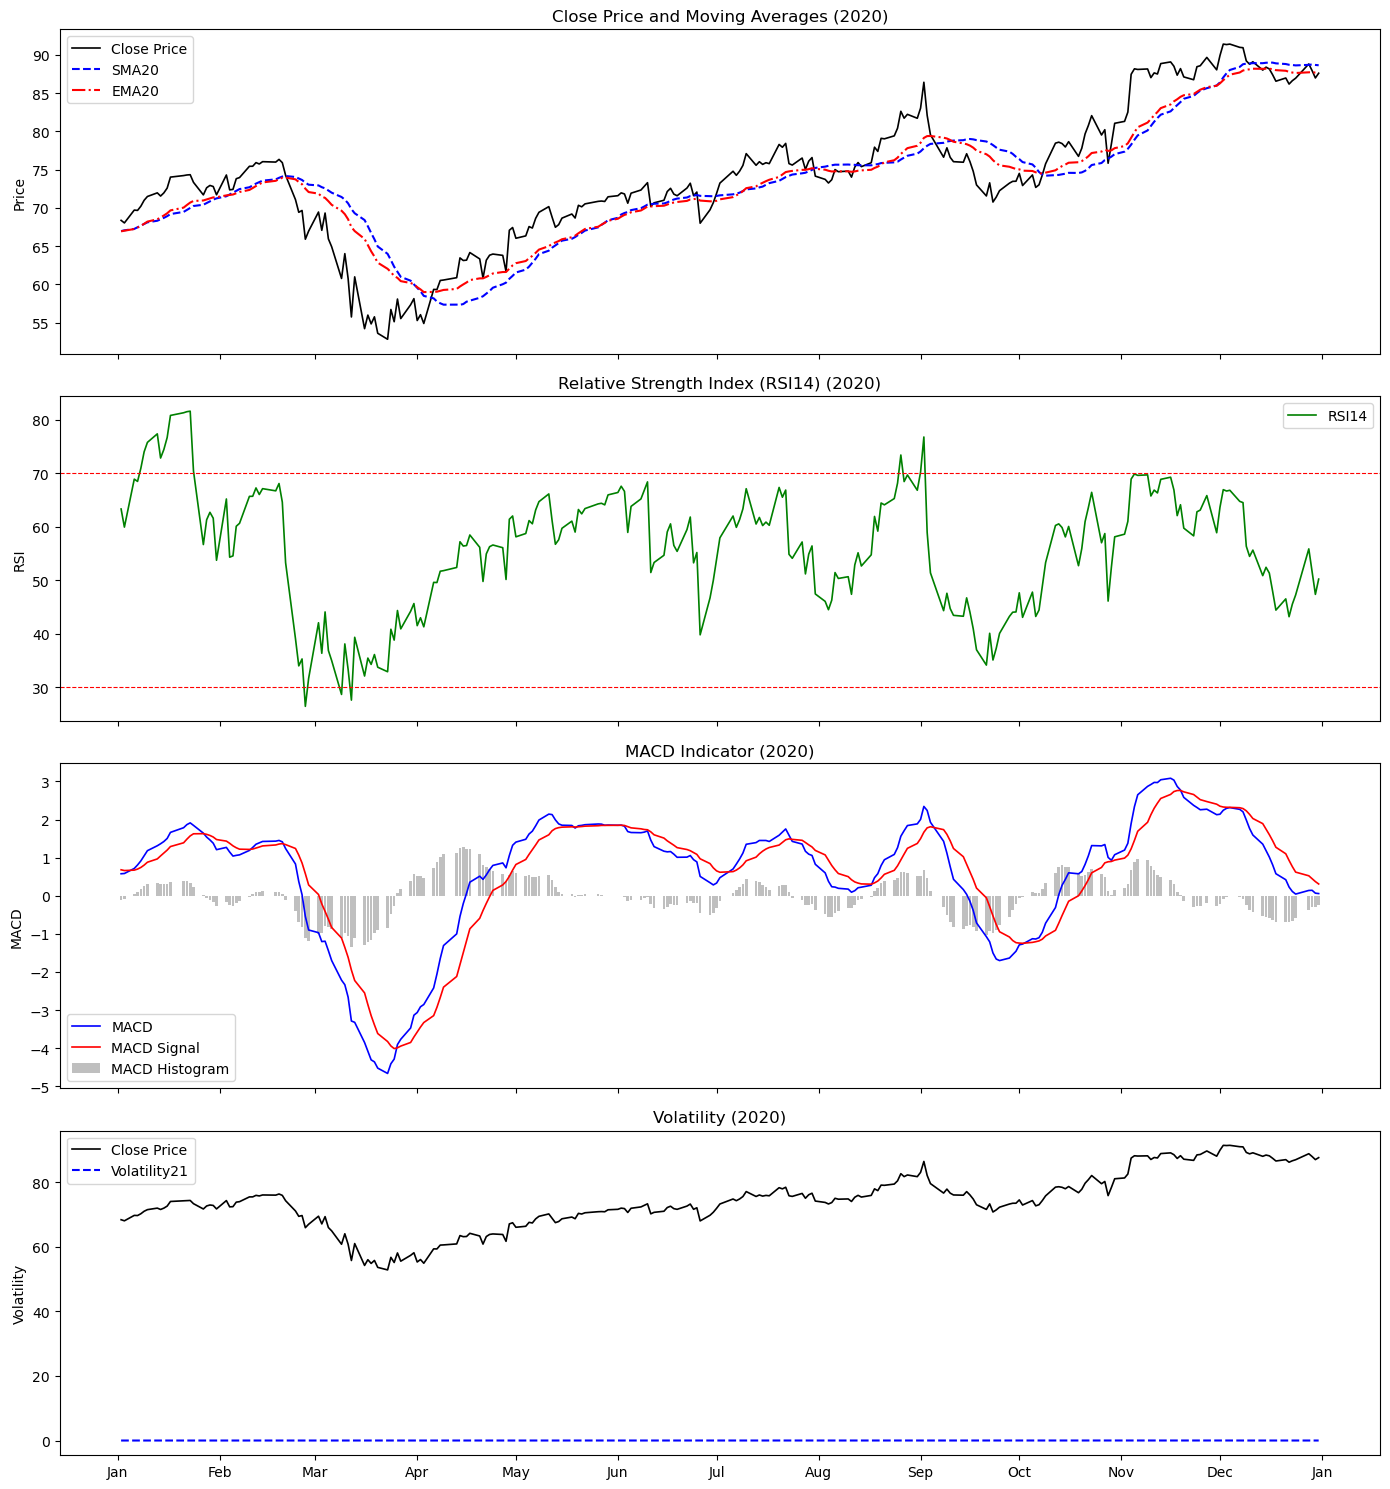

In [75]:
GOOG1 = compute_technical_indicators(GOOG)
plot_technical_indicators(GOOG1)

## FOR MICROSOFT STOCK

In [78]:
MSFT_data = r"C:\Users\hp\Downloads\week 1 data\Data-20240826T133225Z-001\Data\yfinance_data\yfinance_data\MSFT_historical_data.csv"
MSFT = pd.read_csv(MSFT_data)
required_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
MSFT = MSFT[required_columns]

print(MSFT.head())

         Date      Open      High       Low     Close      Volume
0  1986-03-13  0.088542  0.101563  0.088542  0.097222  1031788800
1  1986-03-14  0.097222  0.102431  0.097222  0.100694   308160000
2  1986-03-17  0.100694  0.103299  0.100694  0.102431   133171200
3  1986-03-18  0.102431  0.103299  0.098958  0.099826    67766400
4  1986-03-19  0.099826  0.100694  0.097222  0.098090    47894400


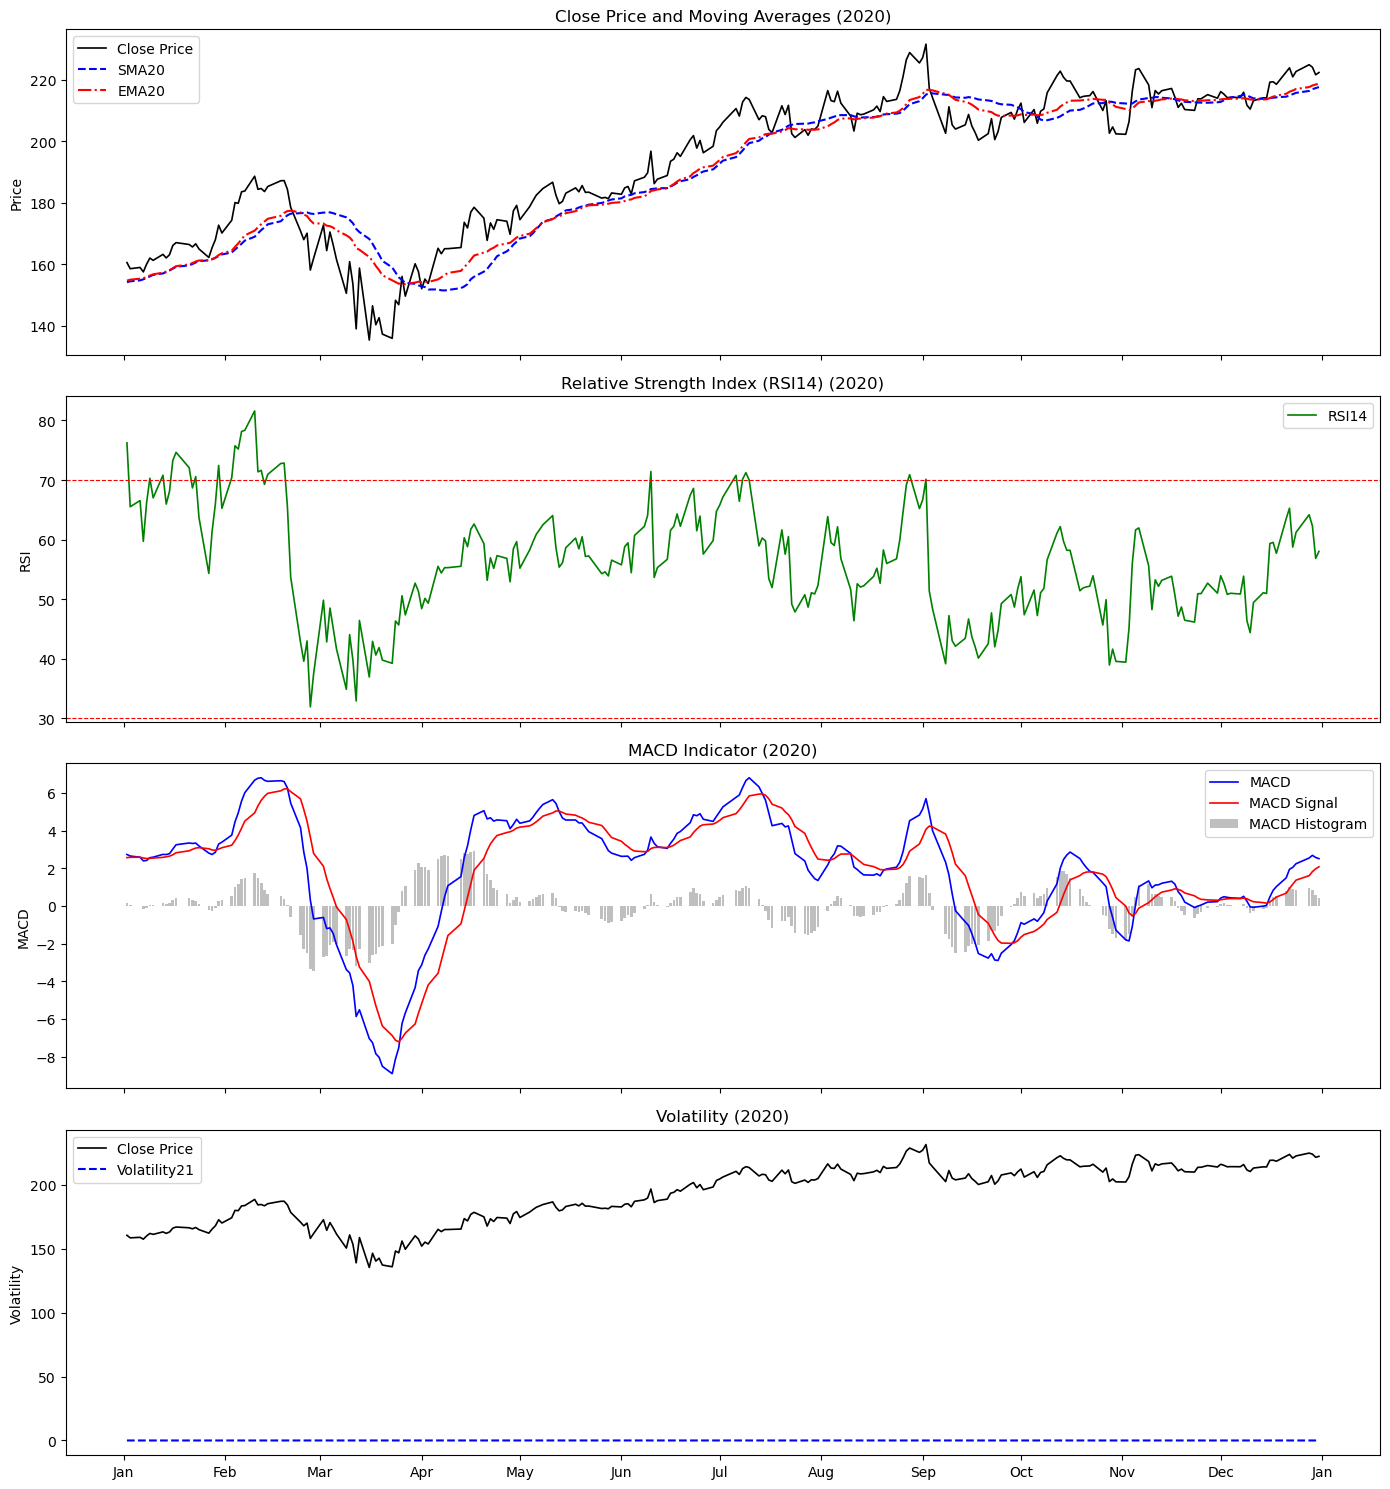

In [80]:
MSFT1 = compute_technical_indicators(MSFT)
plot_technical_indicators(MSFT1)

## FOR NVIDIA STOCK

In [85]:
NVDA_data = r"C:\Users\hp\Downloads\week 1 data\Data-20240826T133225Z-001\Data\yfinance_data\yfinance_data\NVDA_historical_data.csv"

NVDA = pd.read_csv(NVDA_data)
required_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
NVDA = NVDA[required_columns]

print(NVDA.head())

         Date      Open      High       Low     Close      Volume
0  1999-01-22  0.043750  0.048828  0.038802  0.041016  2714688000
1  1999-01-25  0.044271  0.045833  0.041016  0.045313   510480000
2  1999-01-26  0.045833  0.046745  0.041146  0.041797   343200000
3  1999-01-27  0.041927  0.042969  0.039583  0.041667   244368000
4  1999-01-28  0.041667  0.041927  0.041276  0.041536   227520000


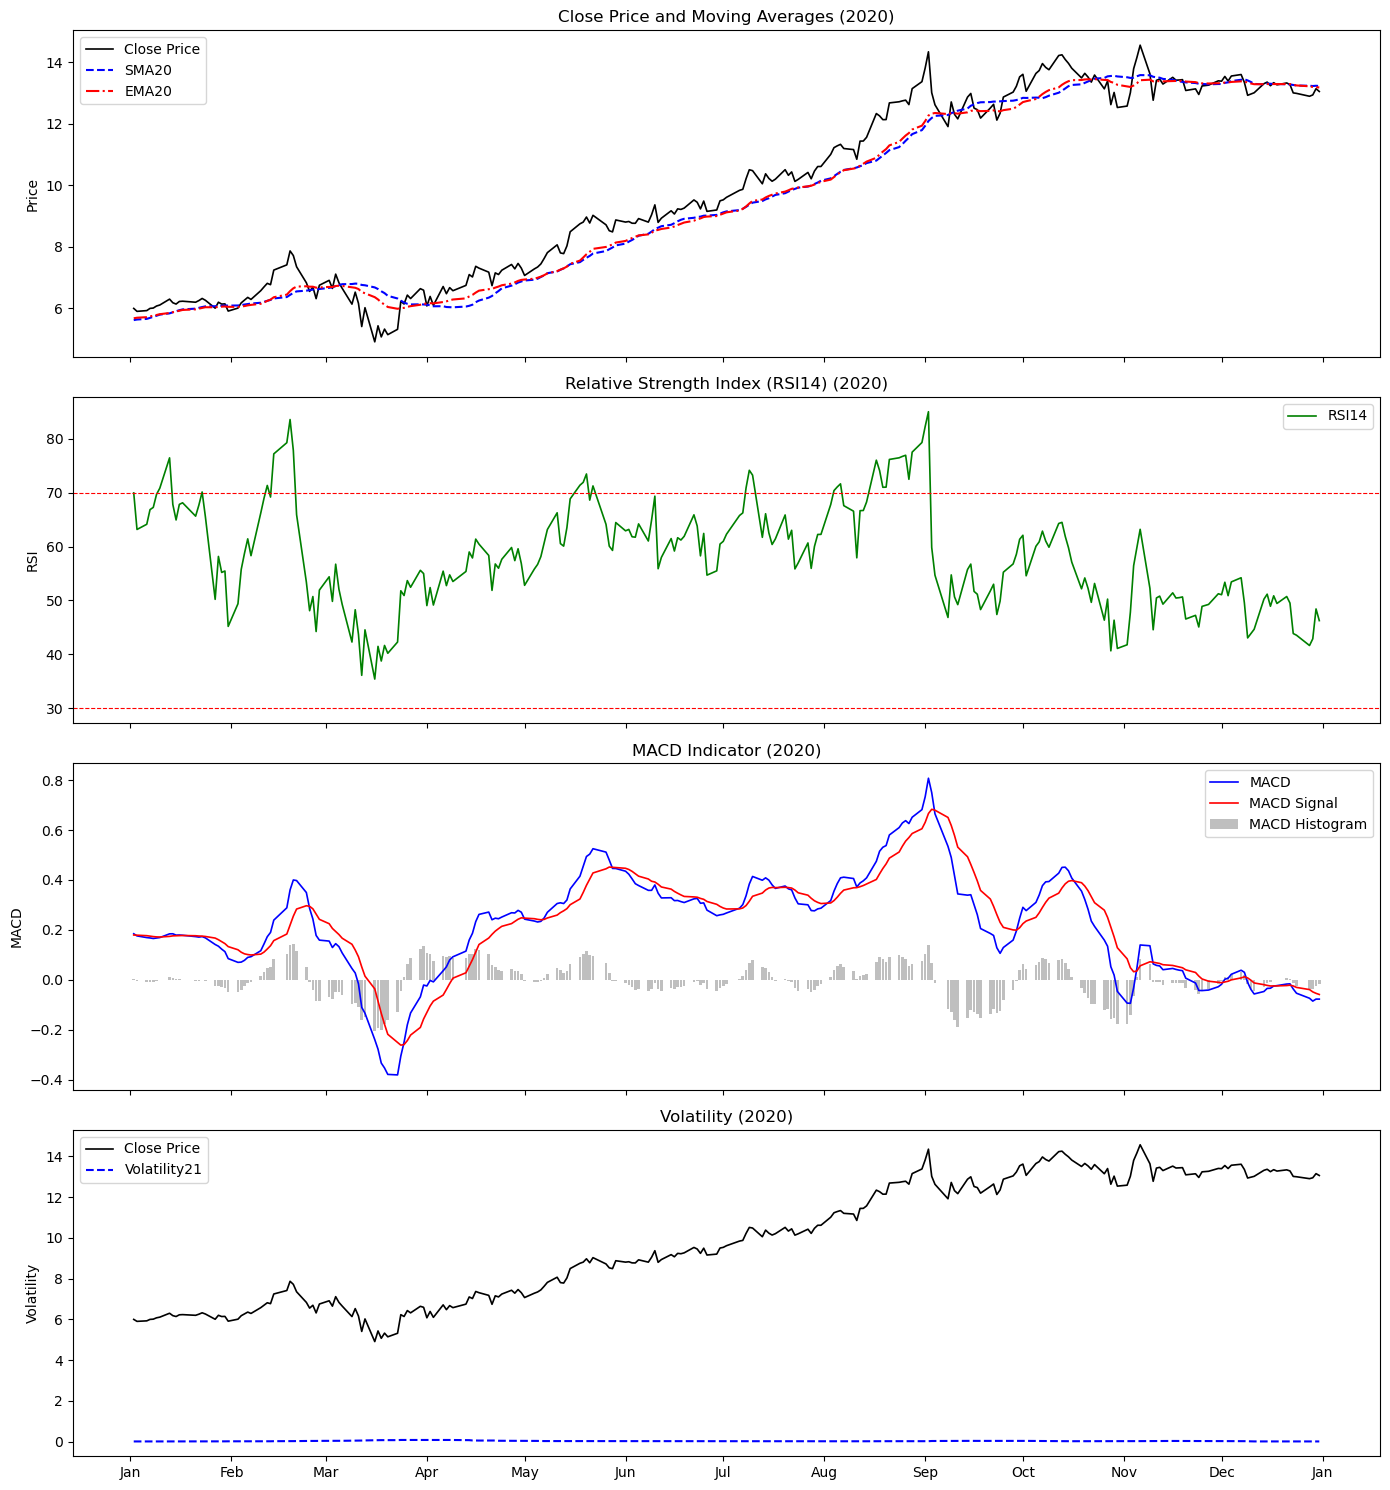

In [87]:
NVDA1 = compute_technical_indicators(NVDA)
plot_technical_indicators(NVDA1)

## FOR TESLA STOCK

In [90]:
TSLA_data = r"C:\Users\hp\Downloads\week 1 data\Data-20240826T133225Z-001\Data\yfinance_data\yfinance_data\TSLA_historical_data.csv"

TSLA = pd.read_csv(TSLA_data)
required_columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
TSLA = TSLA[required_columns]

print(TSLA.head())

         Date      Open      High       Low     Close     Volume
0  2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500
1  2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500
2  2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000
3  2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000
4  2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500


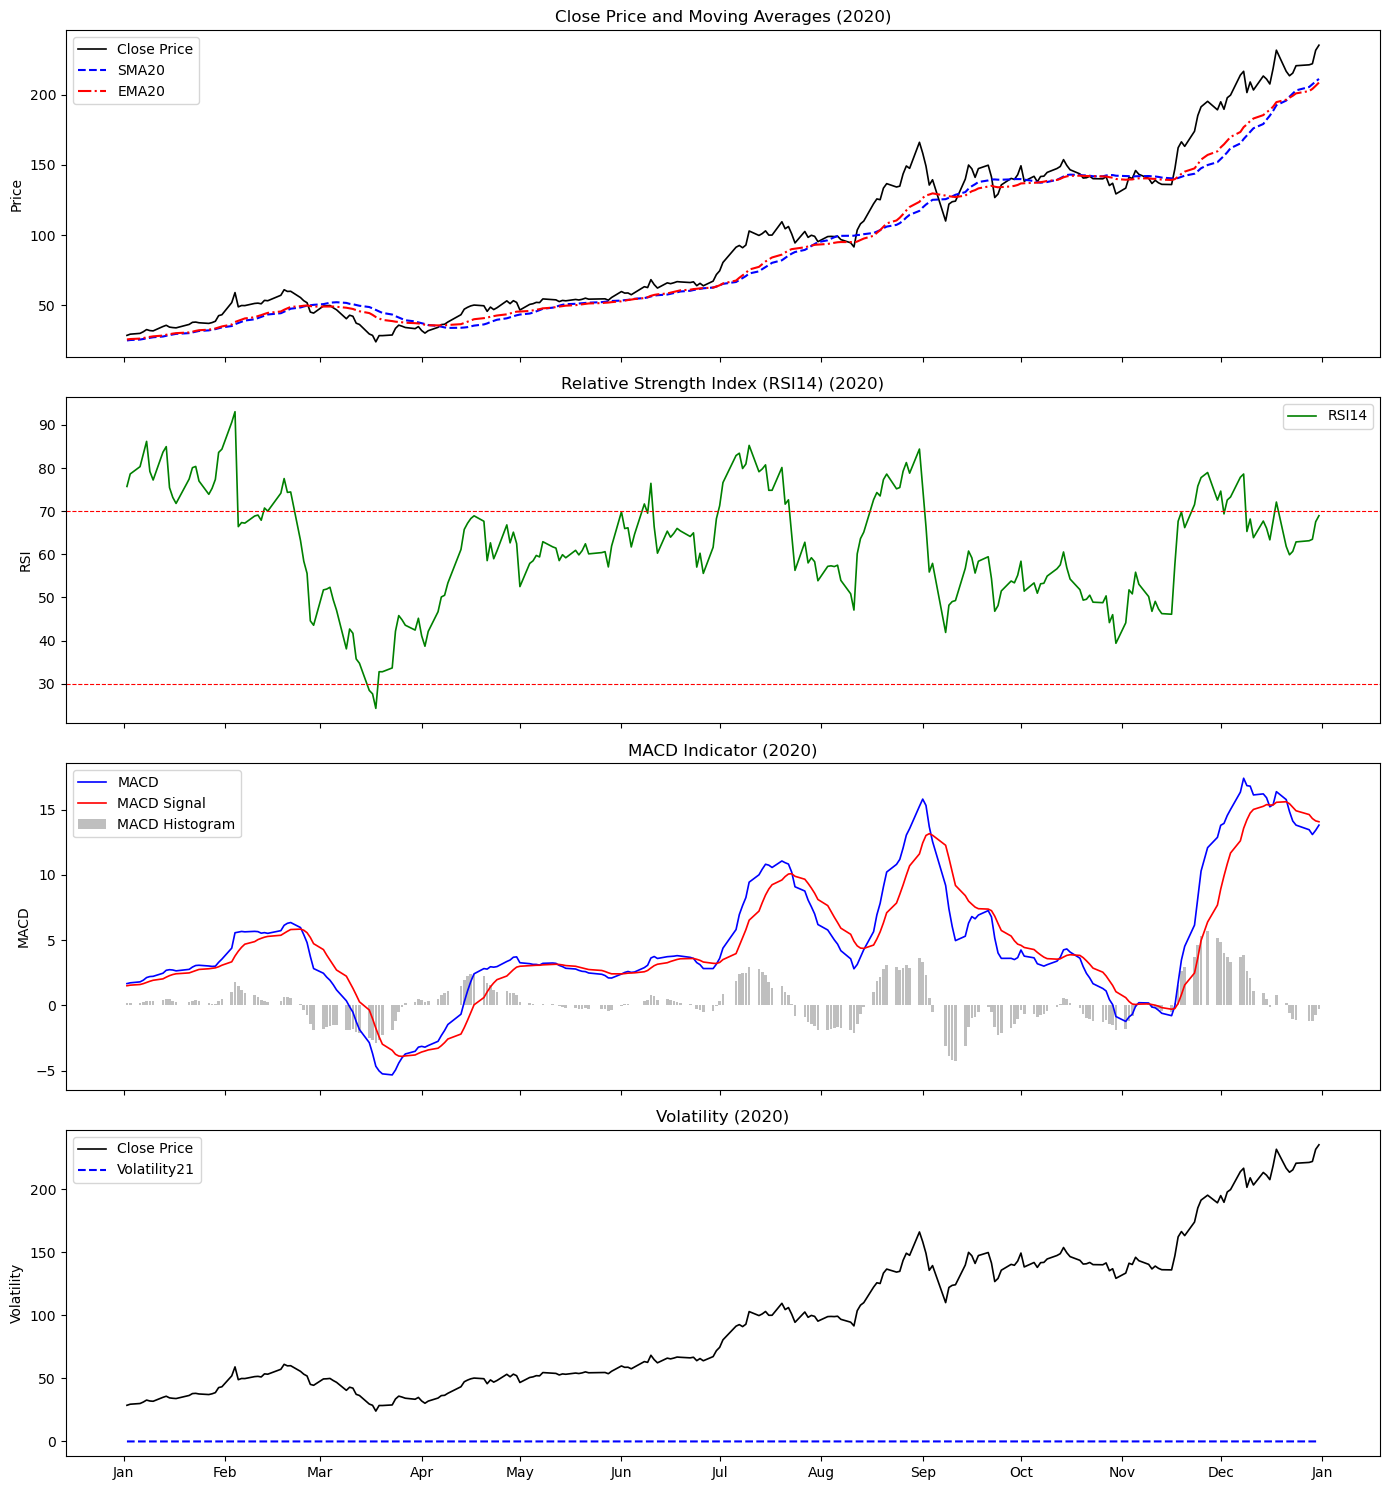

In [92]:
TSLA1 = compute_technical_indicators(TSLA)
plot_technical_indicators(TSLA1)